In [2]:
import requests
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.interpolate import CubicSpline

Obtengo los datos de producción de energía en el mundo de la ONU:

In [3]:
url= 'http://data.un.org/_Docs/SYB/CSV/SYB63_263_202009_Production,%20Trade%20and%20Supply%20of%20Energy.csv'
df= pd.read_csv(url,header=0, skiprows=1)

In [4]:
df.head()

,Region/Country/Area,Unnamed: 1,Year,Series,Value,Footnotes,Source
0,1,"Total, all countries or areas",1990,Primary energy production (petajoules),361763.0,NaN,"United Nations Statistics Division, New York, ..."
1,1,"Total, all countries or areas",1995,Primary energy production (petajoules),381604.0,NaN,"United Nations Statistics Division, New York, ..."
2,1,"Total, all countries or areas",2000,Primary energy production (petajoules),412860.0,NaN,"United Nations Statistics Division, New York, ..."
3,1,"Total, all countries or areas",2005,Primary energy production (petajoules),477404.0,NaN,"United Nations Statistics Division, New York, ..."
4,1,"Total, all countries or areas",2010,Primary energy production (petajoules),530934.0,NaN,"United Nations Statistics Division, New York, ..."


In [5]:
df.drop(columns=['Region/Country/Area','Footnotes'], inplace=True)
df.rename(columns={'Unnamed: 1': 'Country/Region'}, inplace=True)


In [6]:
df['Series'].unique()
df['Country/Region'].unique()

array(['Total, all countries or areas', 'Africa', 'North America',
       'South America', 'Asia', 'Europe', 'Oceania', 'Afghanistan',
       'Albania', 'Algeria', 'Andorra', 'Angola', 'Anguilla',
       'Antigua and Barbuda', 'Argentina', 'Armenia', 'Aruba',
       'Australia', 'Austria', 'Azerbaijan', 'Bahamas', 'Bahrain',
       'Bangladesh', 'Barbados', 'Belarus', 'Belgium', 'Belize', 'Benin',
       'Bermuda', 'Bhutan', 'Bolivia (Plurin. State of)',
       'Bonaire, St. Eustatius & Saba', 'Bosnia and Herzegovina',
       'Botswana', 'Brazil', 'British Virgin Islands',
       'Brunei Darussalam', 'Bulgaria', 'Burkina Faso', 'Burundi',
       'Cabo Verde', 'Cambodia', 'Cameroon', 'Canada', 'Cayman Islands',
       'Central African Republic', 'Chad', 'Chile', 'China',
       'China, Hong Kong SAR', 'China, Macao SAR', 'Colombia', 'Comoros',
       'Congo', 'Cook Islands', 'Costa Rica', 'Côte d’Ivoire', 'Croatia',
       'Cuba', 'Curaçao', 'Cyprus', 'Czechia', "Dem. People's Rep. Kore

                    Country/Region  Year                     Series     Value  \
31   Total, all countries or areas  2017  Total supply (petajoules)  563396.0   
71                          Africa  2017  Total supply (petajoules)   32562.0   
111                  North America  2017  Total supply (petajoules)  113499.0   
151                  South America  2017  Total supply (petajoules)   24158.0   
191                           Asia  2017  Total supply (petajoules)  279048.0   

                                                Source  
31   United Nations Statistics Division, New York, ...  
71   United Nations Statistics Division, New York, ...  
111  United Nations Statistics Division, New York, ...  
151  United Nations Statistics Division, New York, ...  
191  United Nations Statistics Division, New York, ...  


([], [])

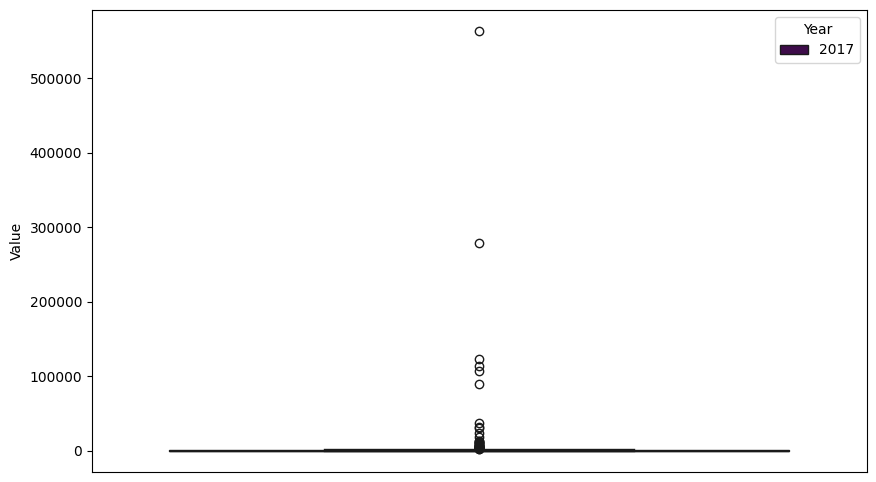

In [7]:
df_all_countries_energy_2017= df[(df['Series']== 'Total supply (petajoules)') & (df['Year']==2017)]
print(df_all_countries_energy_2017.head())
plt.figure(figsize=(10, 6))
sns.boxplot(x= 'Year', y='Value', data=df_all_countries_energy_2017, palette= 'viridis', hue='Year', showfliers= True)
plt.xlabel('')
plt.xticks([])

Hay outliers:

In [8]:
q1= df_all_countries_energy_2017['Value'].quantile(0.25)
q3= df_all_countries_energy_2017['Value'].quantile(0.75)
iqr= q3-q1

inf= q1-1.5*iqr
sup= q3+1.5*iqr

outliers= df_all_countries_energy_2017[(df_all_countries_energy_2017['Value']<inf) | (df_all_countries_energy_2017['Value']>sup)]

display(outliers[['Country/Region', 'Value']])

,Country/Region,Value
31,"Total, all countries or areas",563396.0
71,Africa,32562.0
111,North America,113499.0
151,South America,24158.0
191,Asia,279048.0
231,Europe,107510.0
271,Oceania,6619.0
555,Argentina,3385.0
660,Australia,5353.0
1268,Brazil,12900.0


In [9]:
countries= ['Argentina', 'Chile', 'Indonesia', 'New Zealand', 'South Africa', 'Spain', 'Uruguay']
df_countries= df[df['Country/Region'].isin(countries)]
df_countries.head()

,Country/Region,Year,Series,Value,Source
524,Argentina,1990,Primary energy production (petajoules),2064.0,"United Nations Statistics Division, New York, ..."
525,Argentina,1995,Primary energy production (petajoules),2722.0,"United Nations Statistics Division, New York, ..."
526,Argentina,2000,Primary energy production (petajoules),3413.0,"United Nations Statistics Division, New York, ..."
527,Argentina,2005,Primary energy production (petajoules),3609.0,"United Nations Statistics Division, New York, ..."
528,Argentina,2010,Primary energy production (petajoules),3343.0,"United Nations Statistics Division, New York, ..."


Me quedo solo con los datos en donde Series == Primary energy production (petajoules) o Net imports [Imports - Exports - Bunkers] (petajoules)

In [10]:
df_countries_primary= df_countries[df_countries['Series']=='Primary energy production (petajoules)']
df_countries_net= df_countries[df_countries['Series']=='Net imports [Imports - Exports - Bunkers] (petajoules)']

Comienzo con los datos de Primary energy production:

In [11]:
df_primary_arg= df_countries_primary[df_countries_primary['Country/Region']=='Argentina']
df_primary_chi= df_countries_primary[df_countries_primary['Country/Region']=='Chile']
df_primary_ind= df_countries_primary[df_countries_primary['Country/Region']=='Indonesia']
df_primary_new= df_countries_primary[df_countries_primary['Country/Region']=='New Zealand']
df_primary_sou= df_countries_primary[df_countries_primary['Country/Region']=='South Africa']
df_primary_spa= df_countries_primary[df_countries_primary['Country/Region']=='Spain']
df_primary_uru= df_countries_primary[df_countries_primary['Country/Region']=='Uruguay']

In [12]:
def spline(df_country, value, country, start, end, bc_type='natural'):
    
    sorted_values_dropped = df_country.dropna(subset=[value]).sort_values('Year')
    x = sorted_values_dropped['Year'].astype(float).to_numpy()
    y= sorted_values_dropped[value].astype(float).to_numpy()
    years_full= np.arange(start, end+1, dtype=float)
    cubic_spline= CubicSpline(x, y, bc_type=bc_type, extrapolate= False)
    out= pd.DataFrame({'Year': years_full.astype(int)})
    out[value]= cubic_spline(years_full)
    out['Country']= country
    return out
    

In [13]:

def df_all_countries(countries, df_base):
    df_list=[]
    for country in countries:
        df_country= df_base[df_base['Country/Region']==country]
        df_list.append(spline(df_country, 'Value', country, 1990, 2017))
    return df_list

In [14]:
primary_energy= pd.concat(df_all_countries(countries, df_countries_primary), ignore_index=True)

Text(0, 0.5, 'Primary energy production (petajoules)')

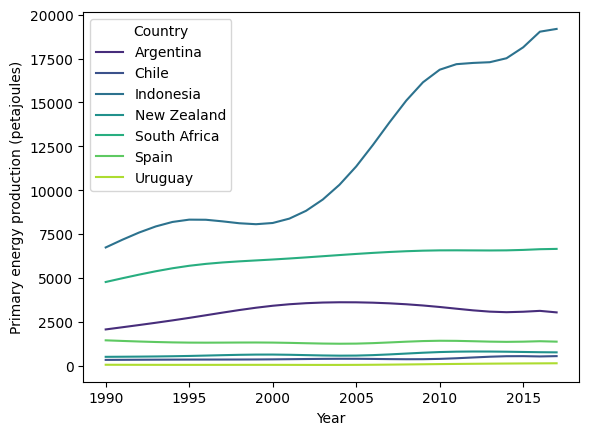

In [15]:
plt.figure()
sns.lineplot(x=primary_energy['Year'], y=primary_energy['Value'], data= primary_energy, hue='Country', palette='viridis')
plt.ylabel('Primary energy production (petajoules)')

Ahora hago lo mismo pero para los Net Imports:

In [16]:
net_imports= pd.concat(df_all_countries(countries, df_countries_net), ignore_index=True)

Text(0, 0.5, 'Net imports [IEB] (petajoules)')

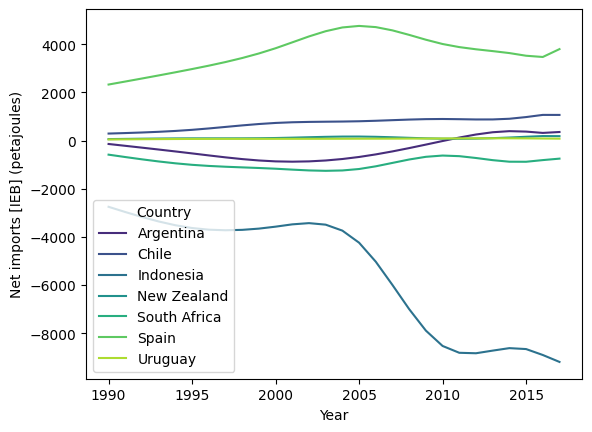

In [17]:
plt.figure()
sns.lineplot(x=net_imports['Year'], y=net_imports['Value'], data= net_imports, hue='Country', palette='viridis')
plt.ylabel('Net imports [IEB] (petajoules)')

Determino el máximo de cada variable en el período y lo marco en el gráfico para cada país

In [18]:
max_energy_row= primary_energy.groupby('Country')['Value'].idxmax()
max_energy= primary_energy.loc[max_energy_row, ['Country', 'Year', 'Value']]

max_net_row= net_imports.groupby('Country')['Value'].idxmax()
max_net= net_imports.loc[max_net_row, ['Country', 'Year', 'Value']]

print(max_energy)

          Country  Year         Value
14      Argentina  2004   3612.296022
55          Chile  2017    543.000000
83      Indonesia  2017  19187.000000
106   New Zealand  2012    806.331226
139  South Africa  2017   6653.000000
140         Spain  1990   1443.000000
195       Uruguay  2017    136.000000


In [19]:
from adjustText import adjust_text


Text(20.847222222222214, 0.5, 'Primary energy production (petajoules)')

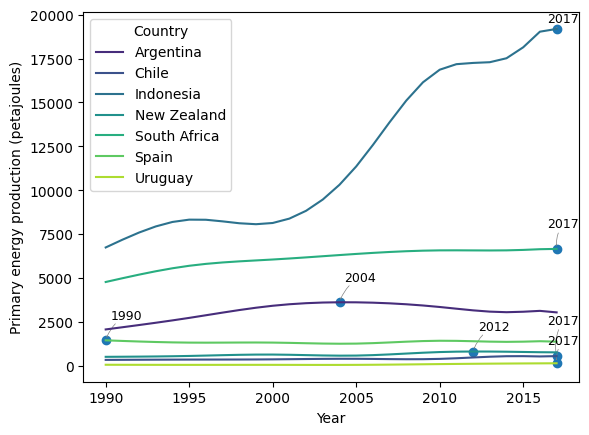

In [31]:
plt.figure()
sns.lineplot(x=primary_energy['Year'], y=primary_energy['Value'], data= primary_energy, hue='Country', palette='viridis')
plt.scatter(x=max_energy['Year'], y=max_energy['Value'])
texts_energy=[]
for _, row in max_energy.iterrows():
    texts_energy.append(plt.text(x=row['Year'], y=row['Value'], s= f'{row['Year']}', fontsize= 9, va='bottom'))
adjust_text(texts_energy, force_explode=(0.5,3),arrowprops=dict(arrowstyle='->', color='gray', lw=0.5, connectionstyle='arc3,rad=0.2'))
plt.ylabel('Primary energy production (petajoules)')

Text(17.972222222222214, 0.5, 'Net imports [IEB] (petajoules)')

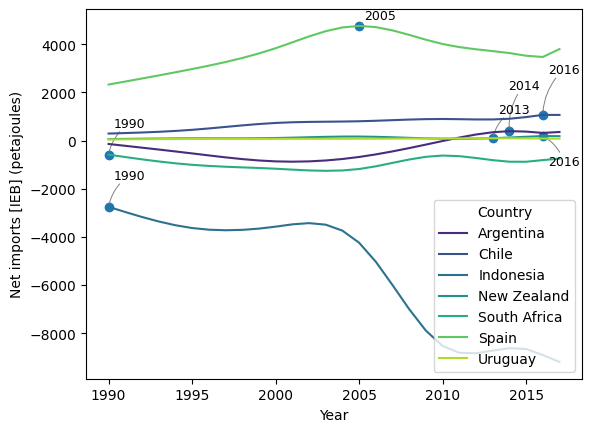

In [30]:
plt.figure()
sns.lineplot(x=net_imports['Year'], y=net_imports['Value'], data= net_imports, hue='Country', palette='viridis')
plt.scatter(x=max_net['Year'], y=max_net['Value'])
texts_net=[]
for _, row in max_net.iterrows():
    texts_net.append(plt.text(x=row['Year'], y=row['Value'], s= f'{row['Year']}', fontsize= 9, va='bottom'))
adjust_text(texts_net, force_explode=(0.5,4), arrowprops=dict(arrowstyle='->', color='grey', lw=0.7, connectionstyle='arc3,rad=0.2'))
plt.ylabel('Net imports [IEB] (petajoules)')